In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
#loading iris dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


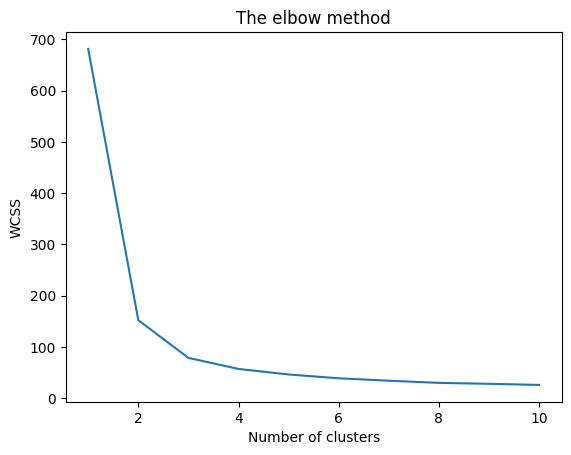

In [13]:
from sklearn.cluster import KMeans
x=df.iloc[:, [0, 1, 2, 3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# plotting the graph to observe the elbow
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we run the algorithm 10 different times with 10 different number of clusters. We calculate the Within Cluster Sum of Squares or ‘W C S S’ for each of the clustering solutions. The WCSS is the sum of the variance between the observations in each cluster. It measures the distance between each observation and the centroid and calculates the squared difference between the two. Hence the name: within cluster sum of squares.
In the loop, we run the K-means method. We set the number of clusters to ‘i’ and initialize with ‘K-means ++’. K-means ++ is an algorithm which runs before the actual k-means and finds the best starting points for the centroids.
Observations:
We see that that on x axis 1 and 2 the value of y is drastically decreasing and from 3 its getting stable so num of clusters we choose is 3.

In [10]:
# implementing k means on iris dataset
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,n_init=10,random_state=0)
ykmeans=kmeans.fit_predict(x)

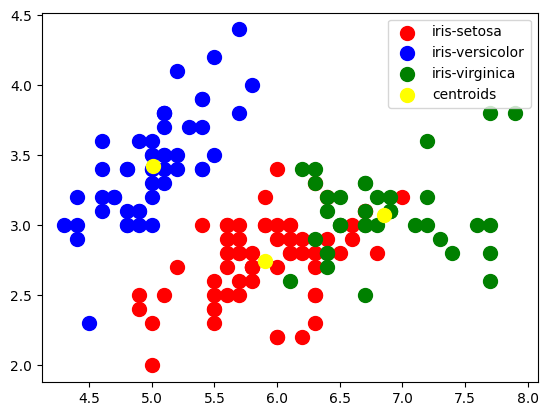

In [12]:
# represing the clusters visually
plt.scatter(x[ykmeans==0,0],x[ykmeans==0,1],s=100,c='red',label='iris-setosa')
plt.scatter(x[ykmeans==1,0],x[ykmeans==1,1],s=100,c='blue',label='iris-versicolor')
plt.scatter(x[ykmeans==2,0],x[ykmeans==2,1],s=100,c='green',label='iris-virginica')
# plotting centroids of cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.legend()